군집

- 군집은 데이터셋을 클러스터라는 그룹으로 나누는 작업이다. 
- 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 

  구분되도록 나누는 것이 목표이다. 
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예측) 한다.

1) k-평균 군집
    - 가장 간단하고 널리 이용되는 군집 알고리즘
    
    - 데이터의 특정 영역을 대표하는 클러스터 중심을 탐색
    
    - 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심 재설정
    
      ( 이 두가지 단계를 반복 하고 ,데이터 포인트에 변화가 없을때 알고리즘 종료 )

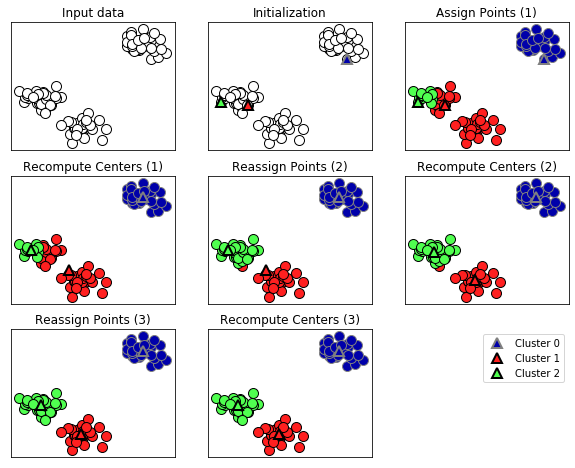

In [31]:
import mglearn
#알고리즘 적용의 예 
mglearn.plots.plot_kmeans_algorithm()

- 각 삼각형은 클러스터 중심이고 원은 데이터 포인트이다. 
- 3개의 클러스트를 찾도록 지정하여 포인트 3개를 무작위로 지정한 후 알고리즘 반복

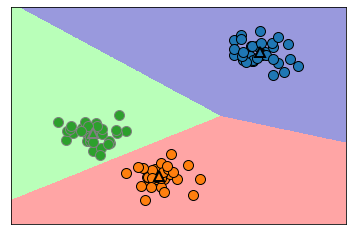

In [3]:
# 클러스터 중심과 경계
mglearn.plots.plot_kmeans_boundaries()

In [5]:
#scikit-learn의 k-평균 알고리즘 예제

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)

#n_cluster의 기본값은 8, 레이블 할당이 무작위여서 클러스트 레이블 변동 가능하다.
kmeans = KMeans(n_clusters =3 )
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#kmeans.labels_속성에서 레이블 확인가능

print('레이블 :' , kmeans.labels_)

#3개의 클러스트를 지정하여 0에서 2까지의 번호가 붙는다.

레이블 : [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [7]:
#predict 매서드를 이용해 새로운 데이터의 클러스트 레이블 예측가능 
# 각 포인트에 가장 가까운 클러스터 중심할당(기존 모델 변경 X)

print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- 군집은 각 데이터 포인트가 레이블을 가져 분류와 비슷해 보이지만 정답을 모르고 있으며 레이블 자체에 의미는 없다.
- 2차원 에제 데이터에서 군집 알고리즘 적용시 0, 1로 지정되는 것은 중요하지 않다. 

  (초기화를 무작위로 하기 때문에 알고리즘을 다시 실행하면 클러스터 번호가 다르게 부여될 수 있다. )

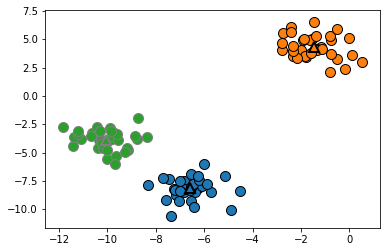

In [9]:
#cluster_centers_속성에 저장된 클러스터 중심을 삼각형으로 표시한 그래프

mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^', markeredgewidth=2)

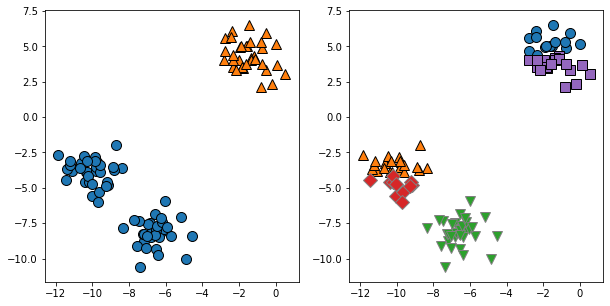

In [13]:
import matplotlib.pyplot as plt
#클러스터 확장 축소

fig, axes = plt.subplots(1,2, figsize=(10,5))

#두 개의 클러스터 중심
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments, ax = axes[0])

#다섯 개의 클러스터 중심
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax=axes[1])

k-평균 알고리즘이 실패하는 경우 

- 데이터 셋의 클러스터 개수를 정확히 알더라도 알고리즘이 항상 이를 구분해내는 것은 아니다.
- 클러스터 정의가 중심 하나뿐이라 클러스터는 둥근 형태로 나타난다. (비교적 간단한 형태 구분 가능 )
- 또한 k-평균은 모든 클러스터 반경이 같다고 가정한다. (클러스터 중심 사이의 정확히 중간에 경계 생성)

Text(0.5, 0, 'F 1')

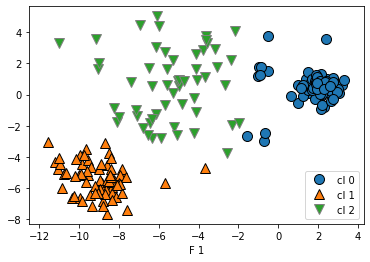

In [14]:
#실패하는 경우의 예 1
X_varied, y_varied = make_blobs(n_samples = 200, cluster_std = [1.0,2.5,0.5], random_state = 170)
y_pred = KMeans ( n_clusters = 3, random_state = 0 ).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)

plt.legend(['cl 0','cl 1','cl 2'],loc='best')
plt.xlabel('F 0')
plt.xlabel('F 1')

- 클러스터 0과 1은 클러스터2의 하단에 위치한 멀리 떨어진 포인트들도 포함하고 있다.
- k-평균은 클러스터에서 모든 방향이 똑같이 중요하다고 가정한다. 
- k-평균은 가장 가까운 클러스터 중심까지의 거리만 고려하여 이러한 데이터 처리능력이 떨어진다.

Text(0, 0.5, 'F 1')

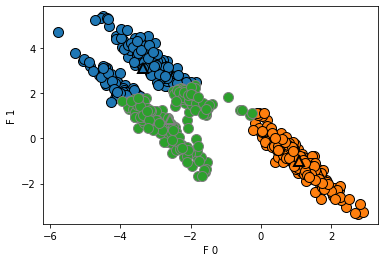

In [16]:
import numpy as np
#무작위 클러스터 데이터 생성
X,y = make_blobs(random_state = 170, n_samples = 600)
rng = np.random.RandomState(74)

#데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

#3개의 클러스터 적용
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터 할당, 중심 시각화
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_ ,markers = 'o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=2)

plt.xlabel('F 0')
plt.ylabel('F 1')

원형이 아닌 클러스터를 구분하지 못한다

Text(0, 0.5, 'F 1')

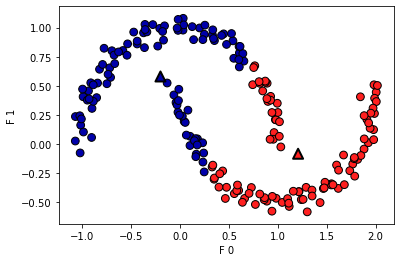

In [24]:
#더욱 복잡한 형태의 데이터는 k-평균의 성능이 더욱 낮아진다.
#two_moons 데이터에 노이즈를 늘린예제

from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

#두개의 클러스터 
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터 할당 및 중심 표시 

plt.scatter(X[:,0] , X[:,1], c = y_pred, cmap = mglearn.cm2, s = 60, edgecolors = 'k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors ='k')
plt.xlabel('F 0')
plt.ylabel('F 1')

벡터 양자화 또는 분해 메서트로서의 k - 평균
- k-평균이 군집 알고리즘이지만 PCA, NMF같은 분해 알고리즘엔 유사점이 존재 
  
  ->PCA는 데이터 분산 가장 큰방향 탐색, NMF 데이터 극단 or 일부에 상응 중첩가능한 성분 탐색
   
    ( 성분의 합으로 표현 )
  
  ->k-평균은 클러스터 중심으로 각 데이터 표현(하나의 성분으로 표현) = 각 포인트가 하나의 성분으로 분해되는 관점인 벡터 양자화 

Text(0, 0.5, 'nmf')

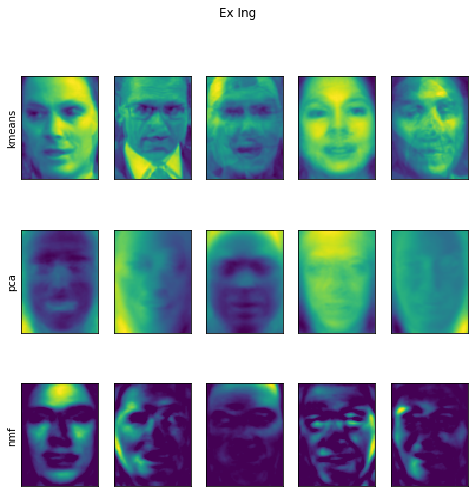

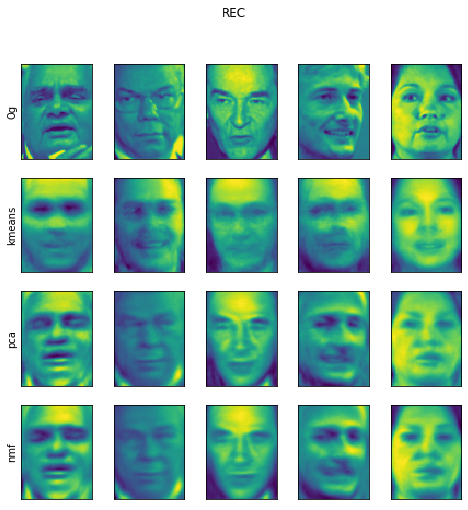

In [33]:
#PCA, NMF, K-평균 추출 성분과 100개 성분으로 얼굴 재구성 비교 (k-평균은 훈련 세트에서 찾은 가장 가까운 클러스터의 중심 )
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정(MinMaxScaler적용과 같다 )
X_people = X_people/255.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state = 42)

from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

nmf = NMF(n_components = 100, random_state = 0 )
nmf.fit(X_train)

pca = PCA(n_components = 100, random_state = 0)
pca.fit(X_train)

kmeans = KMeans(n_clusters = 100, random_state = 0)
kmeans.fit(X_train)

X_re_pca = pca.inverse_transform(pca.transform(X_test))
X_re_km = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_re_nmf = np.dot(nmf.transform(X_test), nmf.components_)

fig, axes = plt.subplots(3,5, figsize=(8,8), subplot_kw={'xticks':(),'yticks':()})
fig.suptitle('Ex Ing')

for ax, comp_kmeans, comp_pca, comp_nmf in zip( axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('kmeans')
axes[1,0].set_ylabel('pca')
axes[2,0].set_ylabel('nmf')

fig, axes = plt.subplots(4,5, subplot_kw={'xticks':(), 'yticks':()}, figsize = (8,8))

fig.suptitle('REC')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_re_km,X_re_pca, X_re_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('Og')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')

- k-평균을 이용한 벡터 양자화는 데이터의 차원보다 더 많은 클러스트 이용하여 데이터 인코딩 가능

클러스터 레이블 : [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


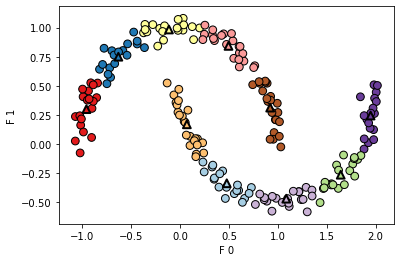

In [34]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
kmeans = KMeans(n_clusters=10, random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c = y_pred, s = 60, cmap = 'Paired', edgecolors = 'black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap = 'Paired', edgecolors = 'black')
plt.xlabel('F 0')
plt.ylabel('F 1')
print('클러스터 레이블 :',y_pred)

- 10개의 클러스터를 이용하여서 포인트는 0~9사이의 숫자가 할당되어 있다. 

  (10개의 특성으로 표현한 것으로 볼 수 있고, 속한 클러스터 외에 다른 특성은 모두 0이라 생각 가능 )
  
- 특성 2개만으로는 불가능 하였지만, 이 10차원 형태를 이용하면 선형 모델을 사용해 두개의 반달 모양 구분 가능
- 클러스터 중심까지의 거리를 특성으로 이용하면 데이터를 더욱 잘 나타낼 수 있다. (transform 매서드 이용가능)

In [36]:
distance_features = kmeans.transform(X)
print('클러스터 거리 데이터 형태:', distance_features.shape)
print('클러스터 거리 :', distance_features)

클러스터 거리 데이터 형태: (200, 10)
클러스터 거리 : [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


- k-평균은 비교적 이해하기 쉽고, 구협도 쉽고 빨라 인기있는 알고리즘이다. 
- 대용량 데이터셋에도 잘 작동하지만 큰 규모 데이터셋 처리 가능한 MiniBatchKMeans도 제공한다.

* k-평균의 단점은 무작위 초기화를 사용하여 알고리즘 출력이 난수 초깃값에 따라 달라진다. 

  (기본적으로 scikit-learn은 서로 다른 난수 초깃값으로 10번 반복하여 최신결과 생성 )
* 더 큰 단점은 클러스터의 모양을 가정하고 있어 활용범위 제한적, 클러스터 갯수 지정 필요

  (실제로는 알 수 없는 경우가 많다. )